<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_Zalando/blob/main/Zalando_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

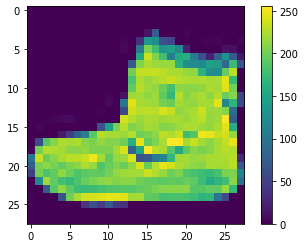

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

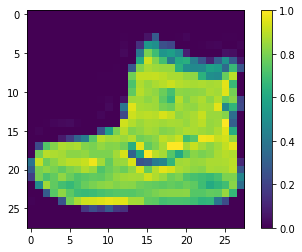

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

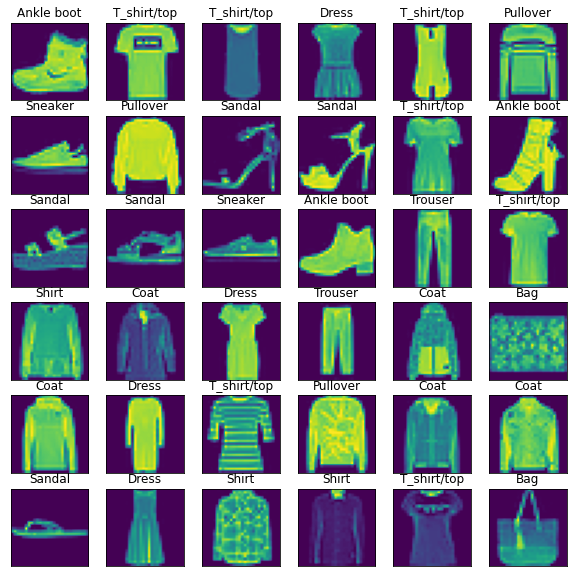

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

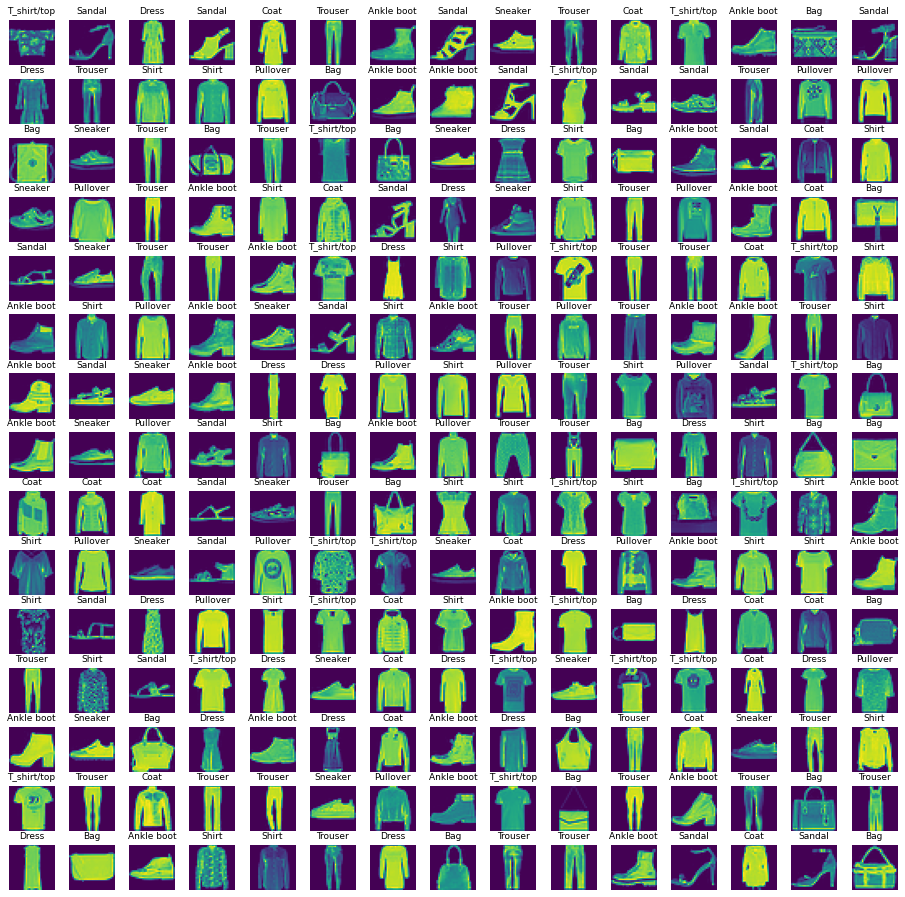

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# Creación de modelo basado en una red neuronal

In [ ]:
# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=train_images.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.9099 - accuracy: 0.6777 - val_loss: 0.5054 - val_accuracy: 0.8183
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5863 - accuracy: 0.7961 - val_loss: 0.4493 - val_accuracy: 0.8367
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5303 - accuracy: 0.8156 - val_loss: 0.4199 - val_accuracy: 0.8483
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.5025 - accuracy: 0.8263 - val_loss: 0.4115 - val_accuracy: 0.8514
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4795 - accuracy: 0.8338 - val_loss: 0.3949 - val_accuracy: 0.8567
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4651 - accuracy: 0.8387 - val_loss: 0.3969 - val_accuracy: 0.8549
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4474 - accuracy: 0.8426 - val_loss: 0.3863 - val_accuracy: 0.8602
Epoch 

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8760
Pérdida del modelo en los datos de prueba: 0.3532
Precisión del modelo en los datos de prueba: 0.8760


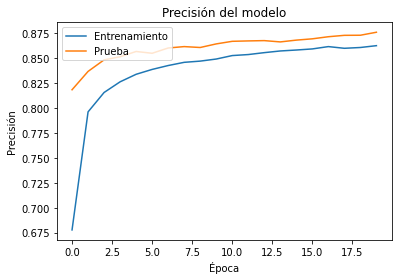

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

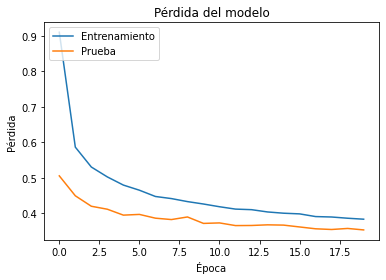

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()